# Resultados

## Solución

## Librerias 

In [4]:
from ML.main import perform #, create_optimization_function

import pandas as pd
import optuna
import matplotlib.pyplot as plt

## Variables globales

In [2]:
commission_value = 0.0025
take_profit_value = 0.05
stop_loss_value = 0.05

## Data 1 D

In [3]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_1d_train.csv')
data_validation = pd.read_csv('data/aapl_1d_test.csv')

data['Timestamp'] = pd.to_datetime(data['Date'])
data_validation['Timestamp'] = pd.to_datetime(data_validation['Date'])

In [69]:
number_of_trials = 40

In [70]:
# Mejores hiperparametros

# Crear una instancia de la función de optimización con los datos cargados
optimization_function_with_data = create_optimization_function(data)

# Ahora, pasamos la función directamente sin llamarla
study = optuna.create_study()
study.optimize(optimization_function_with_data, n_trials=number_of_trials)

print("Mejores parámetros:", study.best_params)

[I 2024-03-22 21:44:01,601] A new study created in memory with name: no-name-0f90a1a7-6671-4a56-a101-74e430f98433
[I 2024-03-22 21:44:17,772] Trial 0 finished with value: -1030316.9262439997 and parameters: {'rsi_buy': 24, 'rsi_sell': 87, 'bb_window': 17, 'mm_short_window': 21, 'mm_long_window': 187, 'stop_loss': 0.0204247626288615, 'take_profit': 0.09267022712974803}. Best is trial 0 with value: -1030316.9262439997.
[I 2024-03-22 21:44:36,614] Trial 1 finished with value: -1259033.7064969987 and parameters: {'rsi_buy': 27, 'rsi_sell': 64, 'bb_window': 22, 'mm_short_window': 37, 'mm_long_window': 117, 'stop_loss': 0.050081448294951834, 'take_profit': 0.08194468397111714}. Best is trial 1 with value: -1259033.7064969987.
[I 2024-03-22 21:49:10,145] Trial 2 finished with value: -1036755.6774660005 and parameters: {'rsi_buy': 24, 'rsi_sell': 81, 'bb_window': 20, 'mm_short_window': 20, 'mm_long_window': 167, 'stop_loss': 0.04815688847328939, 'take_profit': 0.03962346890177194}. Best is tri

Mejores parámetros: {'rsi_buy': 25, 'rsi_sell': 60, 'bb_window': 18, 'mm_short_window': 25, 'mm_long_window': 117, 'stop_loss': 0.08175024242680855, 'take_profit': 0.09418033340512344}


In [74]:
best_params = study.best_params
best_value = -study.best_value

In [75]:
# Resultados de validation con los mejores parametros

rsi_thresholds = (best_params['rsi_buy'], best_params['rsi_sell'])
bb_window = best_params['bb_window']
mm_windows = (best_params['mm_short_window'], best_params['mm_long_window'])  # Corrige las claves aquí
commission = commission_value
stop_loss = stop_loss_value
take_profit = take_profit_value

df_results, strategy_dfs, combined_values_df = perform(
    data_validation, rsi_thresholds, bb_window, mm_windows, commission, stop_loss, take_profit)

best_strategy = df_results.iloc[df_results['gain'].idxmax()]['strategy']  # Suponiendo que 'gain' es tu métrica de rendimiento.
best_strategy_df = strategy_dfs[best_strategy]

df_results.sort_values(by='gain', ascending=False) 

,gain,strategy,orders_executed
0,1.038067e+06,['rsi'],254.0
4,1.009872e+06,"['rsi', 'MM']",73.0
3,1.005020e+06,"['rsi', 'bb']",34.0
1,1.001880e+06,['bb'],72.0
6,1.001491e+06,"['rsi', 'bb', 'MM']",10.0
5,9.989738e+05,"['bb', 'MM']",37.0
2,9.697244e+05,['MM'],728.0


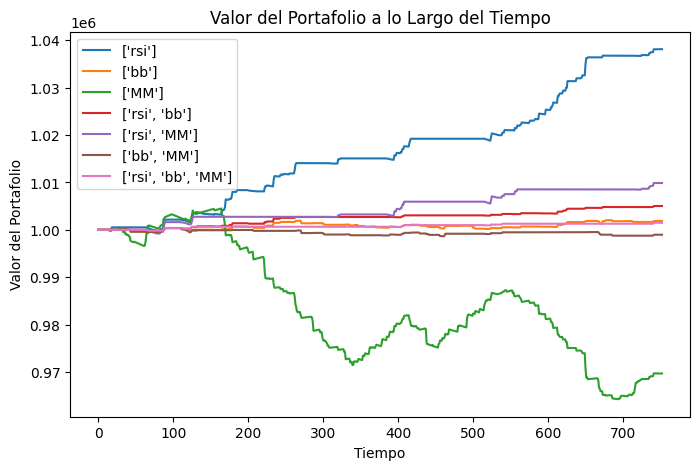

In [76]:
# Valor del Portafolio a lo Largo del Tiempo

plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Data 1 H

In [77]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_1h_train.csv')
data_validation = pd.read_csv('data/aapl_1h_test.csv')

In [78]:
number_of_trials = 40

In [79]:
# Mejores hiperparametros

# Crear una instancia de la función de optimización con los datos cargados
optimization_function_with_data = create_optimization_function(data)

# Ahora, pasamos la función directamente sin llamarla
study = optuna.create_study()
study.optimize(optimization_function_with_data, n_trials=number_of_trials)

print("Mejores parámetros:", study.best_params)

[I 2024-03-22 22:07:59,328] A new study created in memory with name: no-name-b7310481-53d7-4813-b5fc-dcb52d60b416
[I 2024-03-22 22:08:00,747] Trial 0 finished with value: -999671.2123955 and parameters: {'rsi_buy': 34, 'rsi_sell': 84, 'bb_window': 17, 'mm_short_window': 41, 'mm_long_window': 187, 'stop_loss': 0.09568591176948507, 'take_profit': 0.06838746257869734}. Best is trial 0 with value: -999671.2123955.
[I 2024-03-22 22:08:01,728] Trial 1 finished with value: -1000646.0749935925 and parameters: {'rsi_buy': 26, 'rsi_sell': 82, 'bb_window': 22, 'mm_short_window': 41, 'mm_long_window': 130, 'stop_loss': 0.08229796306996454, 'take_profit': 0.04471597178462615}. Best is trial 1 with value: -1000646.0749935925.
[I 2024-03-22 22:08:02,628] Trial 2 finished with value: -1000997.5366833125 and parameters: {'rsi_buy': 15, 'rsi_sell': 90, 'bb_window': 24, 'mm_short_window': 42, 'mm_long_window': 114, 'stop_loss': 0.03199567069895561, 'take_profit': 0.09986553002622064}. Best is trial 2 wit

Mejores parámetros: {'rsi_buy': 23, 'rsi_sell': 63, 'bb_window': 15, 'mm_short_window': 38, 'mm_long_window': 101, 'stop_loss': 0.06654440558098251, 'take_profit': 0.0695612507696871}


In [80]:
best_params = study.best_params
best_value = -study.best_value

In [81]:
# Resultados de validation con los mejores parametros

rsi_thresholds = (best_params['rsi_buy'], best_params['rsi_sell'])
bb_window = best_params['bb_window']
mm_windows = (best_params['mm_short_window'], best_params['mm_long_window'])  # Corrige las claves aquí
commission = commission_value
stop_loss = stop_loss_value
take_profit = take_profit_value

df_results, strategy_dfs, combined_values_df = perform(
    data_validation, rsi_thresholds, bb_window, mm_windows, commission, stop_loss, take_profit)

best_strategy = df_results.iloc[df_results['gain'].idxmax()]['strategy']  # Suponiendo que 'gain' es tu métrica de rendimiento.
best_strategy_df = strategy_dfs[best_strategy]

df_results.sort_values(by='gain', ascending=False) 

,gain,strategy,orders_executed
0,1.191502e+06,['rsi'],1434.0
4,1.039094e+06,"['rsi', 'MM']",309.0
3,1.027842e+06,"['rsi', 'bb']",224.0
6,1.008400e+06,"['rsi', 'bb', 'MM']",70.0
1,1.000268e+06,['bb'],524.0
5,9.919662e+05,"['bb', 'MM']",255.0
2,8.746152e+05,['MM'],5583.0


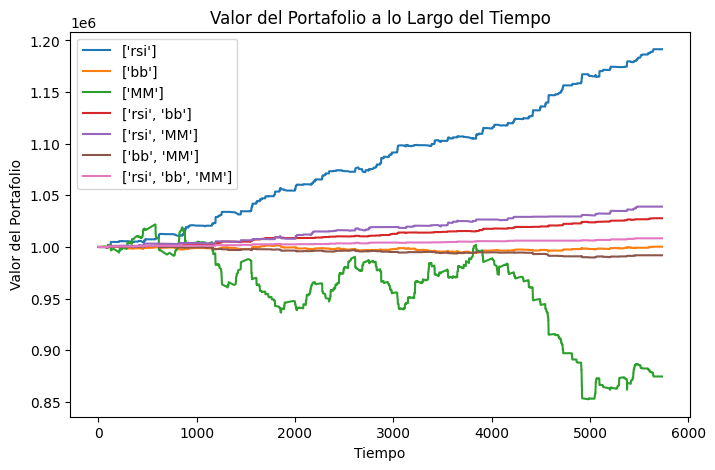

In [82]:
# Valor del Portafolio a lo Largo del Tiempo

plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

### Grafica sin MM (debido a que hace uqe no se vea la magnitud del comportamineto de otras estrategias)

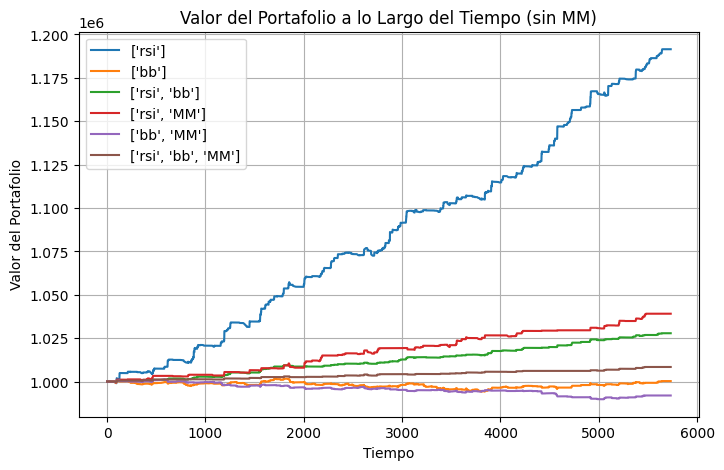

In [83]:
# Valor del Portafolio a lo Largo del Tiempo (sin MM) 

df_without_MM = combined_values_df.drop(columns="['MM']")

# Gráfica sin la columna 'MM'
plt.figure(figsize=[8, 5])
plt.plot(df_without_MM, label=df_without_MM.columns)
plt.title('Valor del Portafolio a lo Largo del Tiempo (sin MM)')
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(df_without_MM.columns)
plt.grid(True)
plt.show()

## Data 5 min

In [4]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_5m_train.csv')
data_validation = pd.read_csv('data/aapl_5m_test.csv')

In [5]:
number_of_trials = 30

In [6]:
# Mejores hiperparametros

# Crear una instancia de la función de optimización con los datos cargados
optimization_function_with_data = create_optimization_function(data)

# Ahora, pasamos la función directamente sin llamarla
study = optuna.create_study()
study.optimize(optimization_function_with_data, n_trials=number_of_trials)

print("Mejores parámetros:", study.best_params)

[I 2024-03-26 11:19:12,153] A new study created in memory with name: no-name-7c7d96ea-b73c-4b46-95a1-e4b0023fc38a
[I 2024-03-26 11:39:55,804] Trial 0 finished with value: -3278855.2076689997 and parameters: {'rsi_buy': 23, 'rsi_sell': 74, 'bb_window': 16, 'mm_short_window': 24, 'mm_long_window': 132}. Best is trial 0 with value: -3278855.2076689997.
[I 2024-03-26 12:12:19,534] Trial 1 finished with value: -3255260.0769316726 and parameters: {'rsi_buy': 18, 'rsi_sell': 78, 'bb_window': 21, 'mm_short_window': 29, 'mm_long_window': 145}. Best is trial 0 with value: -3278855.2076689997.
[I 2024-03-26 12:33:44,088] Trial 2 finished with value: -3206307.8544939947 and parameters: {'rsi_buy': 19, 'rsi_sell': 89, 'bb_window': 17, 'mm_short_window': 25, 'mm_long_window': 167}. Best is trial 0 with value: -3278855.2076689997.
[I 2024-03-26 12:44:27,016] Trial 3 finished with value: -3287712.3570514177 and parameters: {'rsi_buy': 33, 'rsi_sell': 88, 'bb_window': 22, 'mm_short_window': 33, 'mm_lon

Mejores parámetros: {'rsi_buy': 27, 'rsi_sell': 60, 'bb_window': 21, 'mm_short_window': 46, 'mm_long_window': 111}


In [10]:
best_params = study.best_params
best_value = -study.best_value

In [11]:
# Resultados de validation con los mejores parametros

rsi_thresholds = (best_params['rsi_buy'], best_params['rsi_sell'])
bb_window = best_params['bb_window']
mm_windows = (best_params['mm_short_window'], best_params['mm_long_window'])  # Corrige las claves aquí
commission = commission_value
stop_loss = stop_loss_value
take_profit = take_profit_value

df_results, strategy_dfs, combined_values_df = perform(
    data_validation, rsi_thresholds, bb_window, mm_windows, commission, stop_loss, take_profit)

best_strategy = df_results.iloc[df_results['gain'].idxmax()]['strategy']  # Suponiendo que 'gain' es tu métrica de rendimiento.
best_strategy_df = strategy_dfs[best_strategy]

df_results.sort_values(by='gain', ascending=False) 

,gain,strategy,orders_executed
2,1.795336e+06,['MM'],11759.0
0,1.694335e+06,['rsi'],5548.0
4,1.175927e+06,"['rsi', 'MM']",1677.0
3,1.123139e+06,"['rsi', 'bb']",1302.0
6,1.038032e+06,"['rsi', 'bb', 'MM']",535.0
1,1.021387e+06,['bb'],2149.0
5,9.780668e+05,"['bb', 'MM']",1048.0


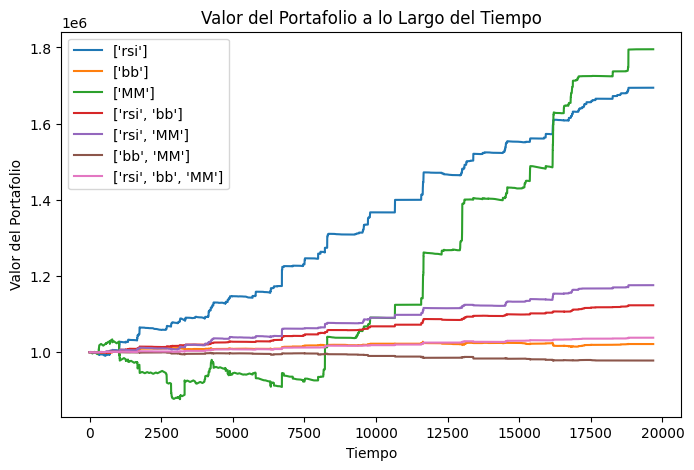

In [13]:
# Valor del Portafolio a lo Largo del Tiempo

plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Data 1 min

In [24]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_1m_train.csv')
data_validation = pd.read_csv('data/aapl_1m_test.csv')

In [27]:
data

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume,BBANDS_UpperBand,BBANDS_LowerBand
0,0,1672736400,0,2023-01-03 09:00:00,130.280,131.000,130.280,131.00,8174,NaN,NaN
1,1,1672736460,0,2023-01-03 09:01:00,130.870,131.170,130.870,131.10,8820,NaN,NaN
2,2,1672736520,0,2023-01-03 09:02:00,131.180,131.240,131.170,131.17,2112,NaN,NaN
3,3,1672736580,0,2023-01-03 09:03:00,131.190,131.290,131.190,131.28,3888,NaN,NaN
4,4,1672736640,0,2023-01-03 09:04:00,131.280,131.460,131.280,131.46,5984,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
136864,40473,1693526100,0,2023-08-31 23:55:00,188.090,188.100,188.080,188.09,301,188.230340,188.055382
136865,40474,1693526160,0,2023-08-31 23:56:00,188.100,188.100,188.080,188.09,335,188.228538,188.058923
136866,40475,1693526220,0,2023-08-31 23:57:00,188.095,188.140,188.095,188.12,2391,188.227044,188.056939
136867,40476,1693526280,0,2023-08-31 23:58:00,188.130,188.150,188.125,188.15,1416,188.227699,188.059693


In [25]:
number_of_trials = 30

In [26]:
# Mejores hiperparametros

# Crear una instancia de la función de optimización con los datos cargados
optimization_function_with_data = create_optimization_function(data)

# Ahora, pasamos la función directamente sin llamarla
study = optuna.create_study()
study.optimize(optimization_function_with_data, n_trials=number_of_trials)

print("Mejores parámetros:", study.best_params)

[I 2024-03-27 17:13:37,040] A new study created in memory with name: no-name-3e1ba3e8-224c-4c2c-83e9-e0ac862f8ab6
[W 2024-03-27 18:35:05,051] Trial 0 failed with parameters: {'rsi_buy': 37, 'rsi_sell': 83, 'bb_window': 23, 'mm_short_window': 46, 'mm_long_window': 196} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "c:\Users\joalf\OneDrive\Documentos\A_ITESO\A_Octavo_Semestre\proyecto trading\002\technical_analysis\main.py", line 97, in optimization_function
    mm_short_window = trial.suggest_int('mm_short_window', 20, 50)
  File "c:\Users\joalf\OneDrive\Documentos\A_ITESO\A_Octavo_Semestre\proyecto trading\002\technical_analysis\main.py", line 72, in perform
    record_df.at[idx, 'Portfolio Value'] = current_portfolio_value
  File "c:\Users\joalf\OneDrive\Documentos\A_ITESO

KeyboardInterrupt: 

In [ ]:
best_params = study.best_params
best_value = -study.best_value

ValueError: No trials are completed yet.

In [ ]:
# Resultados de validation con los mejores parametros

rsi_thresholds = (best_params['rsi_buy'], best_params['rsi_sell'])
bb_window = best_params['bb_window']
mm_windows = (best_params['mm_short_window'], best_params['mm_long_window'])  # Corrige las claves aquí
commission = commission_value
stop_loss = stop_loss_value
take_profit = take_profit_value

df_results, strategy_dfs, combined_values_df = perform(
    data_validation, rsi_thresholds, bb_window, mm_windows, commission, stop_loss, take_profit)

best_strategy = df_results.iloc[df_results['gain'].idxmax()]['strategy']  # Suponiendo que 'gain' es tu métrica de rendimiento.
best_strategy_df = strategy_dfs[best_strategy]

df_results.sort_values(by='gain', ascending=False) 

NameError: name 'best_params' is not defined

In [ ]:
# Valor del Portafolio a lo Largo del Tiempo

plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

NameError: name 'combined_values_df' is not defined

<Figure size 1400x700 with 0 Axes>